___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/ CITY_AQI.csv")

In [3]:
dataset.head()

,City,Date,AQI,Population,Literacy_rate,GDP
0,Ahmedabad,2019-10-28,212,7868633,0.886364,68.0
1,Amaravati,2019-10-28,67,741000,0.920635,62.9
2,Bengaluru,2019-10-28,88,11883000,0.887097,78.0
3,Bhopal,2019-10-28,228,2333000,0.833333,4.0
4,Chennai,2019-10-28,208,10711243,0.901961,70.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

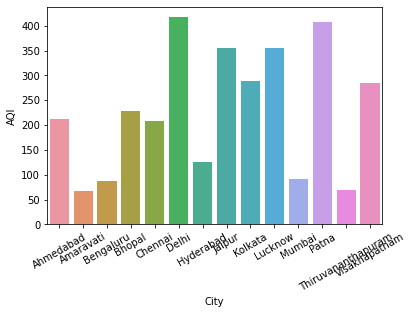

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'],format='%Y-%m-%d') # date parse

df = dataset[['AQI','City']].groupby(dataset['Date']).median().reset_index().sort_values(by='Date',ascending=False)


x = dataset['AQI']
y = dataset['City']
sns.barplot(y,x)
plt.xticks(rotation=30)


In [5]:
dataset.head()

,City,Date,AQI,Population,Literacy_rate,GDP
0,Ahmedabad,2019-10-28,212,7868633,0.886364,68.0
1,Amaravati,2019-10-28,67,741000,0.920635,62.9
2,Bengaluru,2019-10-28,88,11883000,0.887097,78.0
3,Bhopal,2019-10-28,228,2333000,0.833333,4.0
4,Chennai,2019-10-28,208,10711243,0.901961,70.0


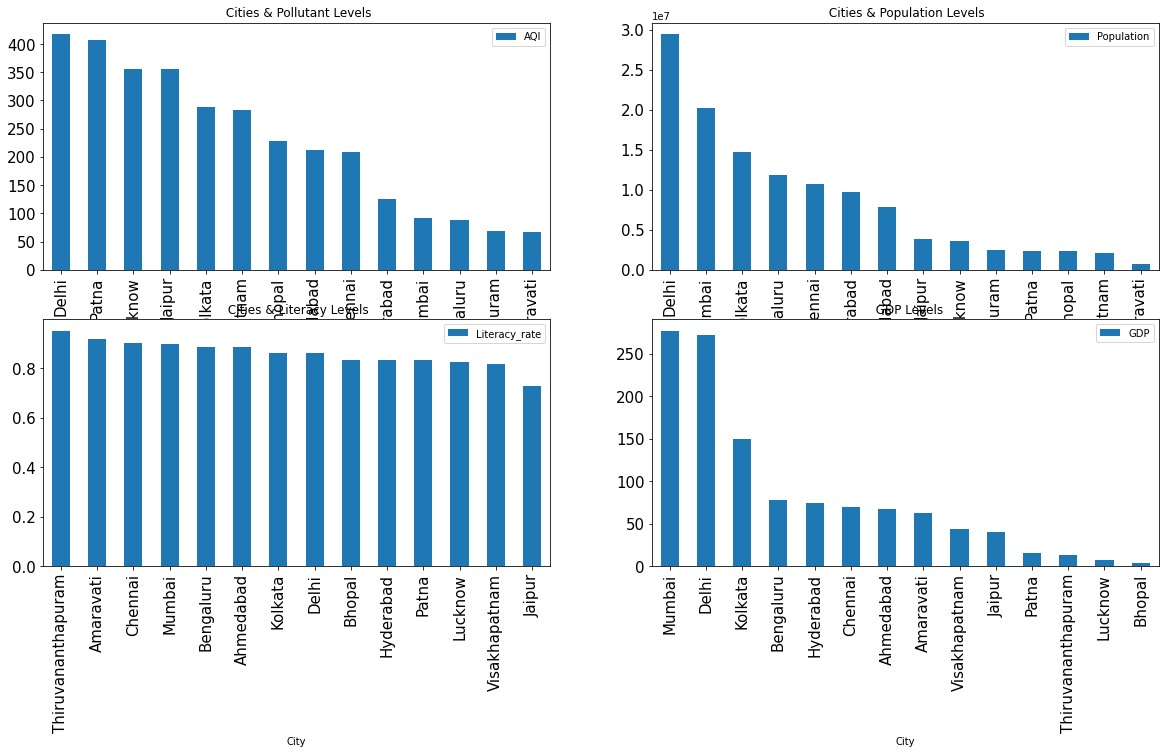

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,40))
city_AQI = dataset[['City','AQI']].groupby('City').mean()
city_AQI.reset_index(inplace = True)
city_AQI.sort_values('AQI', ascending= False, inplace = True)
city_AQI.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = ' Cities & Pollutant Levels',ax=axes[0][0])

City_population = dataset[['City','Population']].groupby('City').mean()
City_population.reset_index(inplace = True)
City_population.sort_values('Population', ascending= False, inplace = True)
City_population.plot(kind = 'bar', figsize= (20,14), x = 'City', fontsize= 15, title = ' Cities & Population Levels',ax=axes[0][1])

City_Literacy = dataset[['City','Literacy_rate']].groupby('City').mean()
City_Literacy.reset_index(inplace = True)
City_Literacy.sort_values('Literacy_rate', ascending= False, inplace = True)
City_Literacy.plot(kind = 'bar', figsize= (20,14), x = 'City', fontsize= 15, title = ' Cities & Literacy Levels',ax=axes[1][0])


City_GDP = dataset[['GDP','City']].groupby('City').mean()
City_GDP.reset_index(inplace = True)
City_GDP.sort_values('GDP', ascending= False, inplace = True)
City_GDP.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = '  GDP Levels',ax=axes[1][1])



In [7]:
# Everything BUT the sales column
X = dataset.drop(['AQI', 'Date','City'], axis=1)

In [8]:
print(X)

    Population  Literacy_rate     GDP
0      7868633       0.886364   68.00
1       741000       0.920635   62.90
2     11883000       0.887097   78.00
3      2333000       0.833333    4.00
4     10711243       0.901961   70.00
5     29399000       0.862069  272.00
6      9741000       0.833333   74.00
7      3812000       0.727273   40.00
8     14755000       0.863158  150.10
9      3590000       0.825000    7.68
10    20185000       0.897436  277.00
11     2378000       0.833333   15.50
12     2477000       0.951220   13.60
13     2125000       0.818182   43.50


In [25]:
y = dataset['AQI']

In [26]:
print(dataset['AQI'])

0     212
1      67
2      88
3     228
4     208
5     417
6     126
7     355
8     289
9     356
10     92
11    408
12     69
13    284
Name: AQI, dtype: int64


## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [30]:
poly_features = polynomial_converter.fit_transform(X)

In [31]:
X.shape

(14, 3)

In [32]:
X.iloc[0]

Population       7.868633e+06
Literacy_rate    8.863636e-01
GDP              6.800000e+01
Name: 0, dtype: float64

In [33]:
poly_features[0]

array([7.86863300e+06, 8.86363636e-01, 6.80000000e+01, 6.19153853e+13,
       6.97447016e+06, 5.35067044e+08, 7.85640495e-01, 6.02727272e+01,
       4.62400000e+03, 4.87189444e+20, 5.48795460e+13, 4.21024620e+15,
       6.18191673e+06, 4.74263971e+08, 3.63845590e+10, 6.96363166e-01,
       5.34235537e+01, 4.09854545e+03, 3.14432000e+05])

In [34]:
poly_features[0][:3]

array([7.86863300e+06, 8.86363636e-01, 6.80000000e+01])

In [35]:
poly_features[0][:3]**2

array([6.19153853e+13, 7.85640495e-01, 4.62400000e+03])

In [36]:
print(X.shape,  y.shape)

(14, 3) (14,)


## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Model for fitting on Polynomial Data

#### Create an instance of the model with parameters

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression(fit_intercept=True)

### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [41]:
model.fit(X_train,y_train)

LinearRegression()


-----

## Evaluation on the Test Set

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [42]:
test_predictions = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [45]:
MAE

202.0701704890897

In [46]:
MSE

50499.55700298098

In [47]:
RMSE

224.72106488485005

In [49]:
dataset['AQI'].mean()

228.5

---
---
## Choosing a Model

### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [50]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

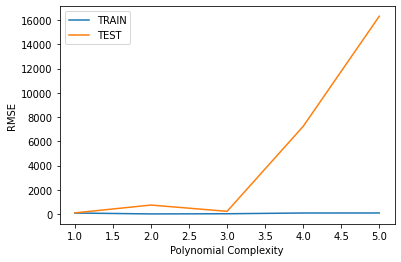

In [51]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

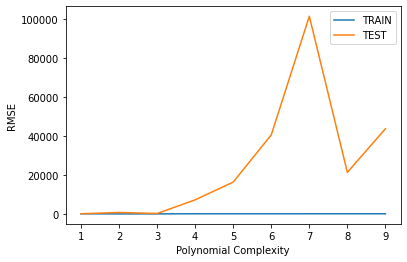

In [52]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

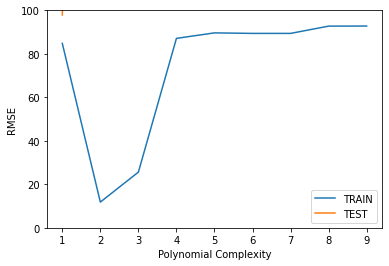

In [53]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [54]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [55]:
final_model = LinearRegression()

In [56]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Saving Model and Converter

In [59]:
from joblib import dump, load

In [60]:
dump(final_model, 'AQI_poly_model.joblib') 

['AQI_poly_model.joblib']

In [61]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next  campaign will have a Population of 100000, Literacy rate of 0.80 and GDP of 70 billion USD What will be the AQI of the city?**

In [62]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('AQI_poly_model.joblib')

In [71]:
campaign = [[100000,0.80,70]]

In [72]:
campaign_poly = loaded_poly.transform(campaign)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [73]:
campaign_poly

array([[1.00e+05, 8.00e-01, 7.00e+01, 1.00e+10, 8.00e+04, 7.00e+06,
        6.40e-01, 5.60e+01, 4.90e+03, 1.00e+15, 8.00e+09, 7.00e+11,
        6.40e+04, 5.60e+06, 4.90e+08, 5.12e-01, 4.48e+01, 3.92e+03,
        3.43e+05]])

In [74]:
final_model.predict(campaign_poly)

array([234.90140365])